In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c LANL-Earthquake-prediction

  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 44.8MB/s]
  0% 0.00/325k [00:00<?, ?B/s]
100% 325k/325k [00:00<00:00, 102MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 102MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 101MB/s]
  0% 0.00/325k [00:00<?, ?B/s]
100% 325k/325k [00:00<00:00, 105MB/s]
  0% 0.00/330k [00:00<?, ?B/s]
100% 330k/330k [00:00<00:00, 105MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 105MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 106MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 97.9MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 99.5MB/s]
  0% 0.00/320k [00:00<?, ?B/s]
100% 320k/320k [00:00<00:00, 107MB/s]
  0% 0.00/332k [00:00<?, ?B/s]
100% 332k/332k [00:00<00:00, 103MB/s]
  0% 0.00/324k [00:00<?, ?B/s]
100% 324k/324k [00:00<00:00, 108MB/s]
  0% 0.00/312k [00:00<?, ?B/s]
100% 312k/312k [00:00<00:00, 99.4MB/s]
  0% 0.00/315k [00:00<?, ?B/s]

In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
import numpy as np # linear algebra
%tensorflow_version 1.x
import tensorflow as tf
import torch
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
#MinMaxScalar is used to normalize the value before training
#is used to deal with the data after train and split as data will be in form of aray for training and testing.
from keras.models import Sequential
#keras has 2 models one is functional and another is sequential
from keras.layers import Dense
#Dense layer is the output layer
from keras.layers import LSTM
#library used to calculate the mean square error. For classification accuracy is calculated and for regression mean square error is calculated
import math, os
from sklearn.metrics import mean_squared_error


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv',nrows= 2000000 ,dtype={'acoustic_data': np.int16,'time_to_failure': np.float64})

In [ ]:
#train.drop(train.head(6000000).index, inplace=True)

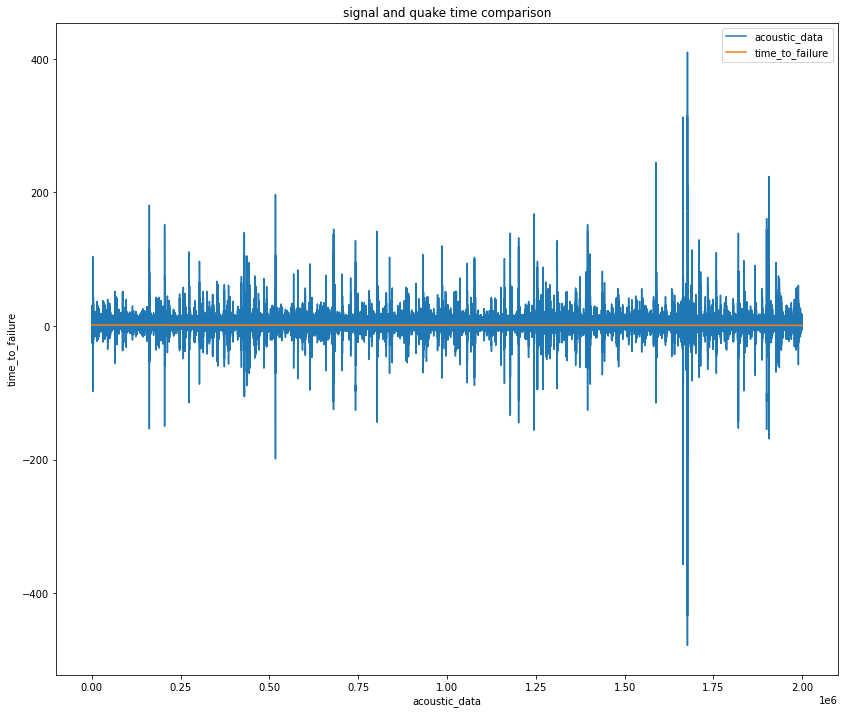

In [ ]:
train.plot(kind = 'line', figsize = (14,12))
plt.title('signal and quake time comparison')
plt.xlabel('acoustic_data')
plt.ylabel('time_to_failure')
plt.show()

In [ ]:
train.shape

(2000000, 2)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1 , 1))
data = scaler.fit_transform(train)
target = train['time_to_failure']

In [ ]:
target.head(3)

0    1.4691
1    1.4691
2    1.4691
Name: time_to_failure, dtype: float64

In [ ]:
data

array([[ 0.1036036 ,  1.        ],
       [ 0.09009009,  1.        ],
       [ 0.09459459,  0.99999999],
       ...,
       [ 0.09459459, -0.99999999],
       [ 0.09684685, -1.        ],
       [ 0.08783784, -1.        ]])

In [ ]:
#module for training and splitting
from sklearn.model_selection import train_test_split
#
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=1, random_state=0)

In [ ]:
print(X_train,(X_train.shape[0],1,X_train.shape[1]))

[[ 0.08558559 -0.69684575]
 [ 0.14189189  0.2584702 ]
 [ 0.09459459  0.88942874]
 ...
 [ 0.07882883  0.88519446]
 [ 0.08558559 -0.48343944]
 [ 0.09459459  0.69683099]] (1999999, 1, 2)


In [ ]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
#converting the shape in the way machine will take for training
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

Shape of X_train: (1999999, 2)
Shape of X_test: (1, 2)
Shape of y_train: (1999999,)
Shape of y_test: (1,)


In [ ]:
X_train.shape

(1999999, 1, 2)

In [ ]:
model = Sequential()
model.add(LSTM(48, input_shape=(1, 2)))
#output layer contains 1 neuron to predict the output
model.add(Dense(1))
#as the data is continous, hence loss function is mean_squared_error
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
model.load_weights('/content/drive/My Drive/Epochs/epochs:001.hdf5')
model.summary()
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score of epoch 1: %.2f RMSE' % (testScore))

model.load_weights('/content/drive/My Drive/Epochs/epochs:002.hdf5')
model.summary()
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score of epoch 2: %.2f RMSE' % (testScore))

model.load_weights('/content/drive/My Drive/Epochs/epochs:003.hdf5')
model.summary()
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score of epoch 3: %.2f RMSE' % (testScore))

model.load_weights('/content/drive/My Drive/Epochs/epochs:004.hdf5')
model.summary()
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score of epoch 4: %.2f RMSE' % (testScore))

model.load_weights('/content/drive/My Drive/Epochs/epochs:005.hdf5')
model.summary()
Predict = model.predict(X_test)
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Root mean square error Test Score of epoch 5: %.2f RMSE' % (testScore))


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 48)                9792      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 49        
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
_________________________________________________________________
Root mean square error Test Score of epoch 1: 3.40 RMSE
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 48)                9792      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 49        
Total params: 9,841
Trainable params: 9,841
Non-trainable params: 0
______________________________________